Imports 

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, precision_score
import sys
import os

sys.path.append('E:\\Titanic---Machine-Learning-from-Disaster\\Codes')

from utils.functions import get_train_test_data


In [5]:
path_train = "E:\\Titanic---Machine-Learning-from-Disaster\\Data\\train.csv"
path_test = "E:\\Titanic---Machine-Learning-from-Disaster\\Data\\test.csv"


df_train, df_test = get_train_test_data(path_train, path_test, pre_processing_enabled=True)


E:\Titanic---Machine-Learning-from-Disaster\Codes\utils\functions.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].interpolate(method='linear', inplace=True)
E:\Titanic---Machine-Learning-from-Disaster\Codes\utils\functions.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
df_test

,PassengerId,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34,0,0,0.0,1.0,0.0,0.0,1.0
1,893,47,1,0,1.0,0.0,0.0,0.0,1.0
2,894,62,0,0,0.0,1.0,0.0,1.0,0.0
3,895,27,0,0,0.0,1.0,0.0,0.0,1.0
4,896,22,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1305,33,0,0,0.0,1.0,0.0,0.0,1.0
414,1306,39,0,0,1.0,0.0,1.0,0.0,0.0
415,1307,38,0,0,0.0,1.0,0.0,0.0,1.0
416,1308,38,0,0,0.0,1.0,0.0,0.0,1.0


In [7]:
df_train

,PassengerId,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Survived
0,1,22,1,0,0.0,1.0,0.0,0.0,1.0,0
1,2,38,1,0,1.0,0.0,1.0,0.0,0.0,1
2,3,26,0,0,1.0,0.0,0.0,0.0,1.0,1
3,4,35,1,0,1.0,0.0,1.0,0.0,0.0,1
4,5,35,0,0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,27,0,0,0.0,1.0,0.0,1.0,0.0,0
887,888,19,0,0,1.0,0.0,1.0,0.0,0.0,1
888,889,22,1,2,1.0,0.0,0.0,0.0,1.0,0
889,890,26,0,0,0.0,1.0,1.0,0.0,0.0,1


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Precision Score: {precision:.4f}")

Accuracy Score: 0.7932
Average Precision Score: 0.6636
Precision Score: 0.7921


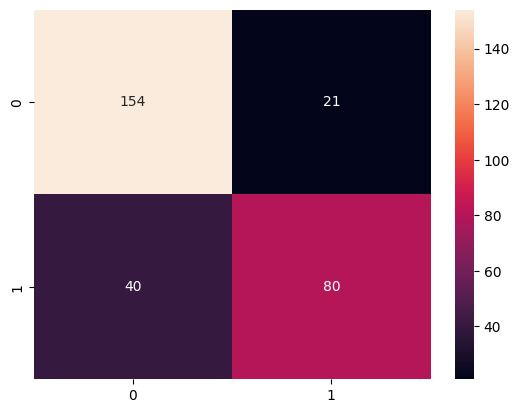

In [13]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='');

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}



grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


/home/henrique/workspace/Titanic---Machine-Learning-from-Disaster/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/henrique/workspace/Titanic---Machine-Learning-from-Disaster/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/henrique/workspace/Titanic---Machine-Learning-from-Disaster/env/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/ho

In [21]:
best_model

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

Recreating the model with grid search

In [22]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Precision Score: {precision:.4f}")

Accuracy Score: 0.8034
Average Precision Score: 0.6782
Precision Score: 0.8039


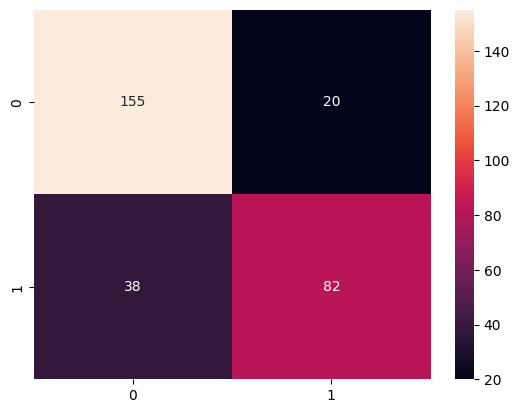

In [24]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='');